# ETL Penetración de Internet fijo (accesos por cada 100 hogares):

In [532]:
import pandas as pd

In [533]:
df_pen_int_fij_x100h = pd.read_csv('../CSV data importada/CSV Accesos a internet/Penetración de Internet fijo (accesos por cada 100 hogares).csv', encoding='UTF-8', sep=',', decimal=',' )

In [534]:
df_pen_int_fij_x100h.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [535]:
df_pen_int_fij_x100h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [536]:
df_pen_int_fij_x100h.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [537]:
df_pen_int_fij_x100h.drop_duplicates()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
...,...,...,...,...
835,2014,1,Santa Cruz,28.94
836,2014,1,Santa Fe,47.85
837,2014,1,Santiago Del Estero,16.31
838,2014,1,Tierra Del Fuego,63.97


In [538]:
df_pen_int_fij_x100h.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [539]:
df_pen_int_fij_x100h.describe(include='all')

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
count,840.000000,840.000000,840,840.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,35,NaN
mean,2017.885714,2.457143,NaN,49.065750
std,2.528745,1.105009,NaN,23.151885
min,2014.000000,1.000000,NaN,9.350000
25%,2016.000000,1.000000,NaN,32.107500
50%,2018.000000,2.000000,NaN,45.900000
75%,2020.000000,3.000000,NaN,61.865000


In [540]:
# Renombrar la columna 'Año' a 'anio'
df_pen_int_fij_x100h.rename(columns={'Año': 'anio'}, inplace=True)
# Convertir todas las columnas a minúsculas utilizando rename() y lower()
df_pen_int_fij_x100h = df_pen_int_fij_x100h.rename(columns=str.lower)

In [541]:
df_pen_int_fij_x100h.head()

,anio,trimestre,provincia,accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [542]:
df_pen_int_fij_x100h['anio_tri'] = df_pen_int_fij_x100h['anio'].astype(str) + df_pen_int_fij_x100h['trimestre'].astype(str)

In [543]:
# Situar la columna 'anio_tri' como la primera columna
df_pen_int_fij_x100h = df_pen_int_fij_x100h[['anio_tri'] + df_pen_int_fij_x100h.columns[:-1].tolist()]

In [544]:
df_pen_int_fij_x100h.head()

,anio_tri,anio,trimestre,provincia,accesos por cada 100 hogares
0,20223,2022,3,Buenos Aires,78.11
1,20223,2022,3,Capital Federal,122.28
2,20223,2022,3,Catamarca,65.33
3,20223,2022,3,Chaco,43.86
4,20223,2022,3,Chubut,84.38


In [545]:
import seaborn as sns

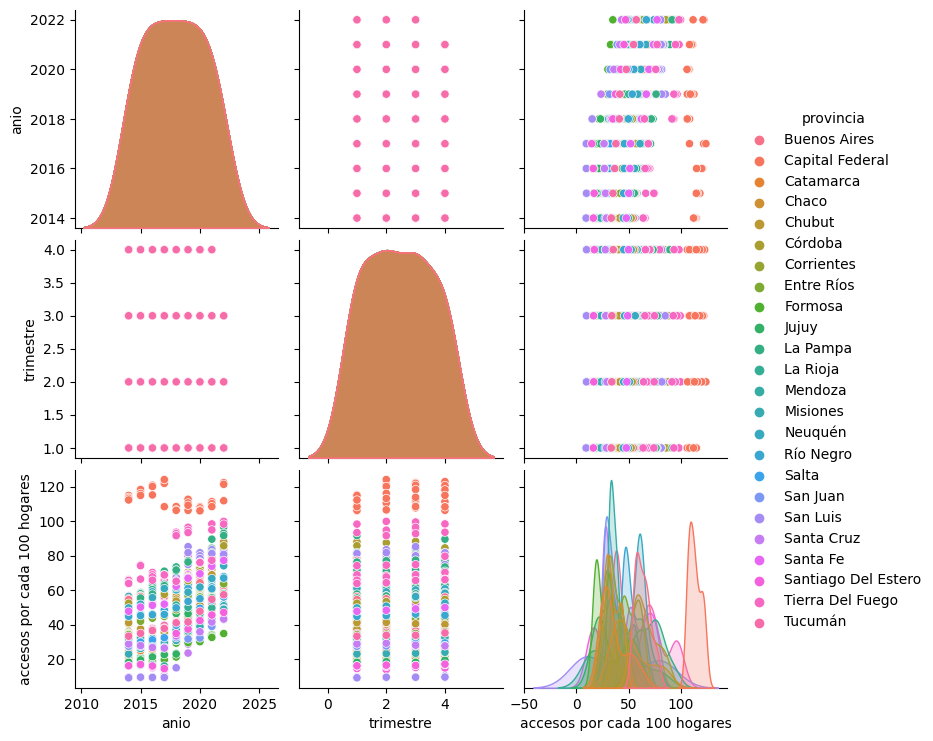

In [546]:
sns.pairplot(df_pen_int_fij_x100h,hue='provincia')

C:\Users\Luca\AppData\Local\Temp\ipykernel_912\982976832.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_pen_int_fij_x100h[col], rotation=90)


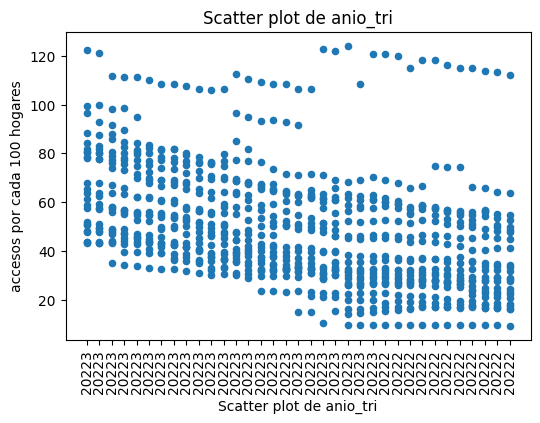

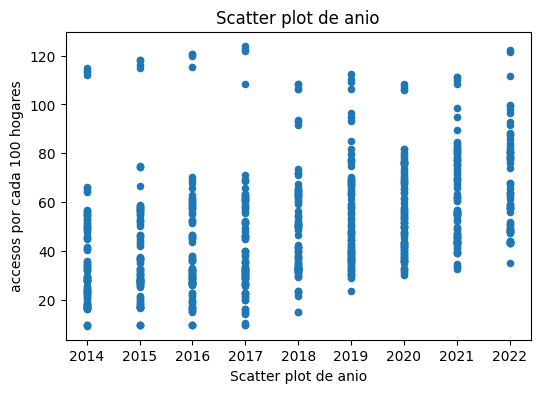

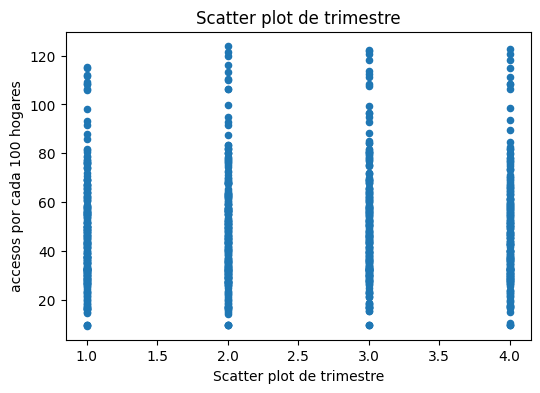

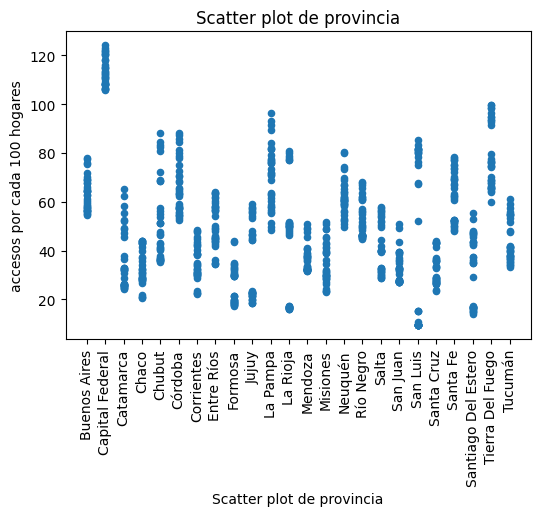

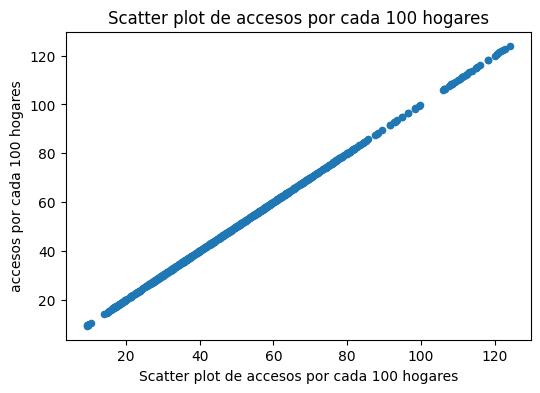

In [547]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar sólo las columnas numéricas para el boxplot
cols = [col for col in df_pen_int_fij_x100h.columns if col not in []]

# Crear un scatter plot separado para cada columna
for col in cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    df_pen_int_fij_x100h.plot.scatter(x=col, y='accesos por cada 100 hogares', ax=ax)
   
    ax.set_ylabel('accesos por cada 100 hogares')
    ax.set_xlabel(f'Scatter plot de {col}')
    ax.set_title(f'Scatter plot de {col}')
    
    # Rotar las leyendas del eje x para 'provincia' y 'anio_tri'
    if col in ['provincia', 'anio_tri']:
        ax.set_xticklabels(df_pen_int_fij_x100h[col], rotation=90)

    plt.show()



In [548]:
# ordenar el DataFrame por año y trimestre
df_pen_int_fij_x100h = df_pen_int_fij_x100h.sort_values(by=["anio_tri"])


In [549]:
df_pen_int_fij_x100h

,anio_tri,anio,trimestre,provincia,accesos por cada 100 hogares
839,20141,2014,1,Tucumán,33.42
816,20141,2014,1,Buenos Aires,54.57
817,20141,2014,1,Capital Federal,112.25
818,20141,2014,1,Catamarca,24.25
819,20141,2014,1,Chaco,20.72
...,...,...,...,...,...
21,20223,2022,3,Santiago Del Estero,47.98
22,20223,2022,3,Tierra Del Fuego,99.51
23,20223,2022,3,Tucumán,61.14
12,20223,2022,3,Mendoza,51.03


# Calculo Incrementos %:

In [550]:

# calcular la variación porcentual entre los valores de accesos de un trimestre a otro
df_pen_int_fij_x100h["variacion de los accesos por cada 100 hogares"] = df_pen_int_fij_x100h.groupby("provincia")["accesos por cada 100 hogares"].pct_change()

# rellenar los valores nulos con ceros en la columna "variacion"
df_pen_int_fij_x100h["variacion de los accesos por cada 100 hogares"] = df_pen_int_fij_x100h["variacion de los accesos por cada 100 hogares"].fillna(0)

# mostrar el resultado
df_pen_int_fij_x100h.head(5)

,anio_tri,anio,trimestre,provincia,accesos por cada 100 hogares,variacion de los accesos por cada 100 hogares
839,20141,2014,1,Tucumán,33.42,0.0
816,20141,2014,1,Buenos Aires,54.57,0.0
817,20141,2014,1,Capital Federal,112.25,0.0
818,20141,2014,1,Catamarca,24.25,0.0
819,20141,2014,1,Chaco,20.72,0.0


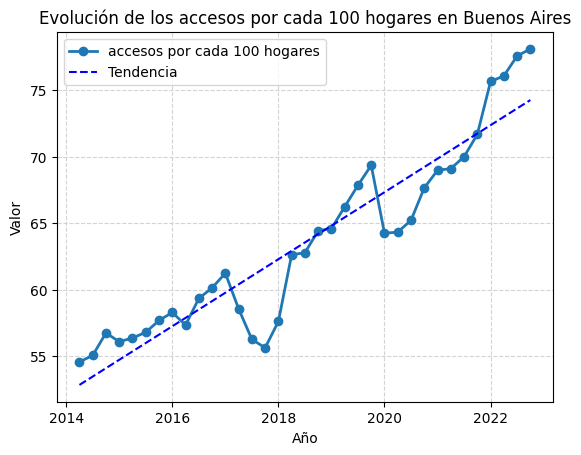

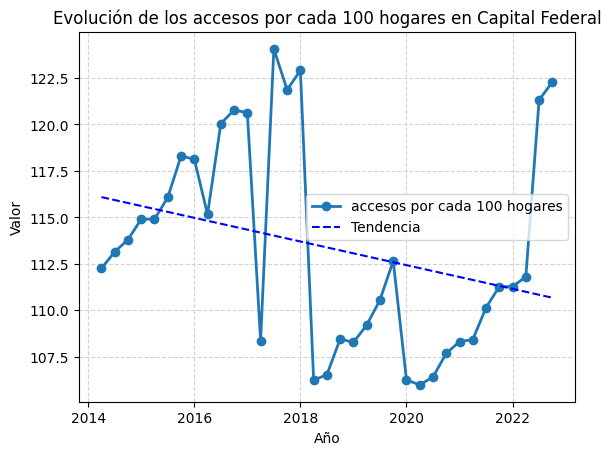

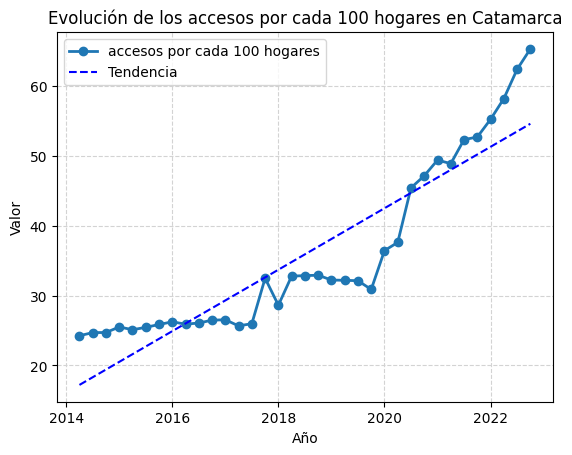

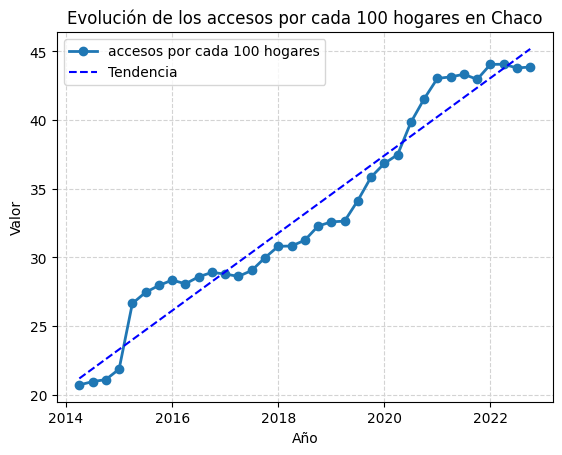

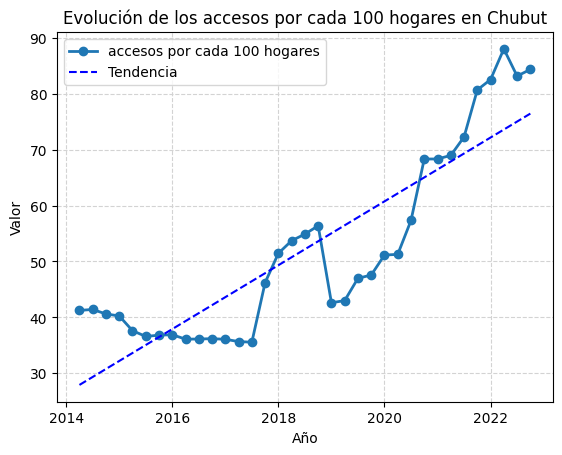

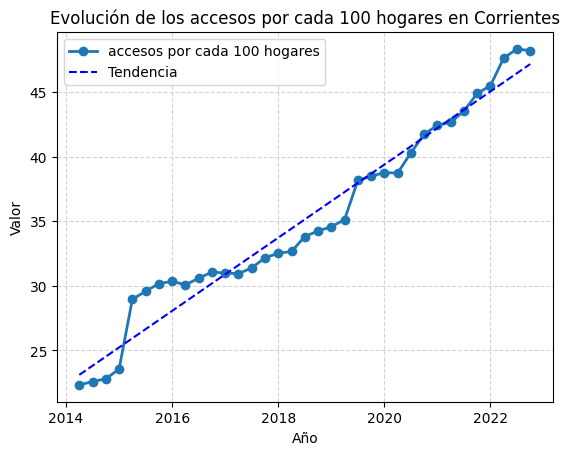

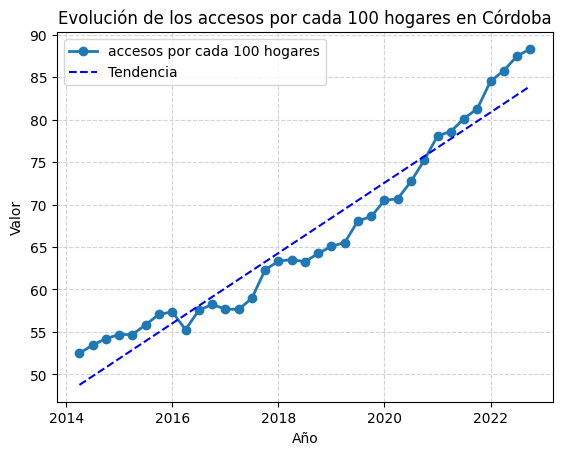

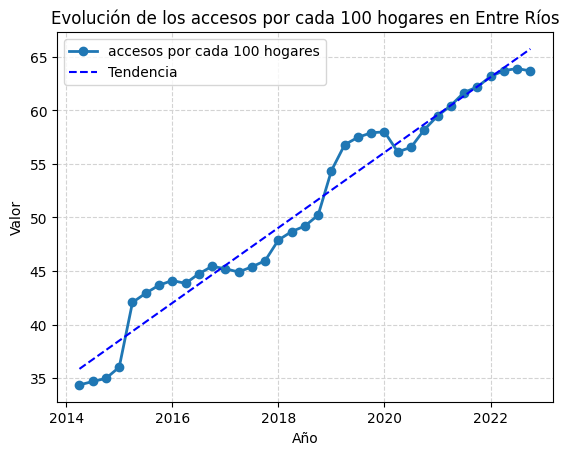

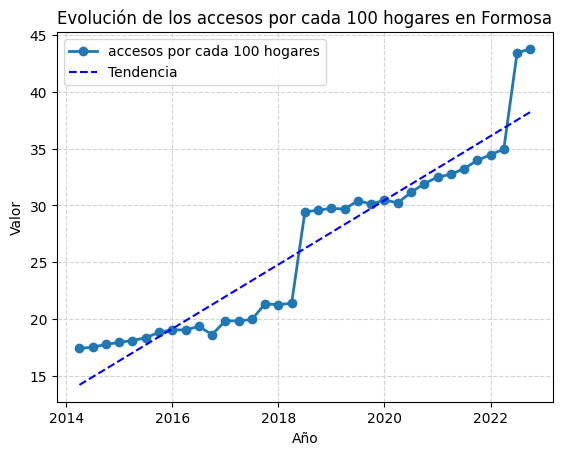

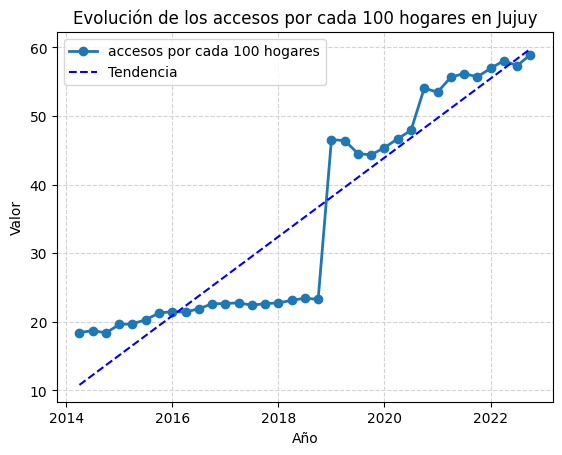

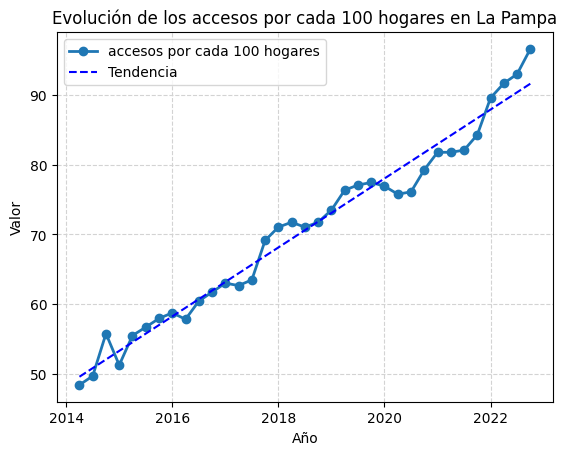

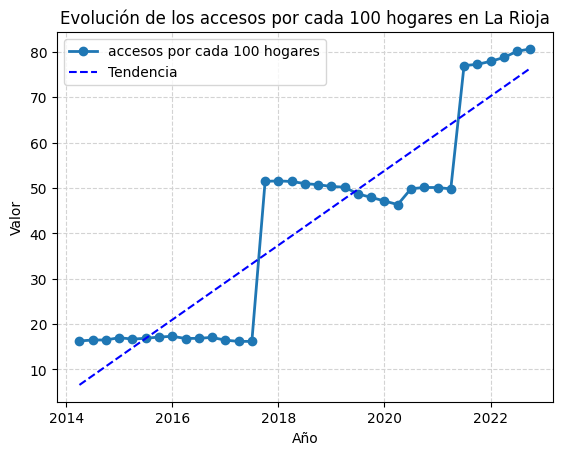

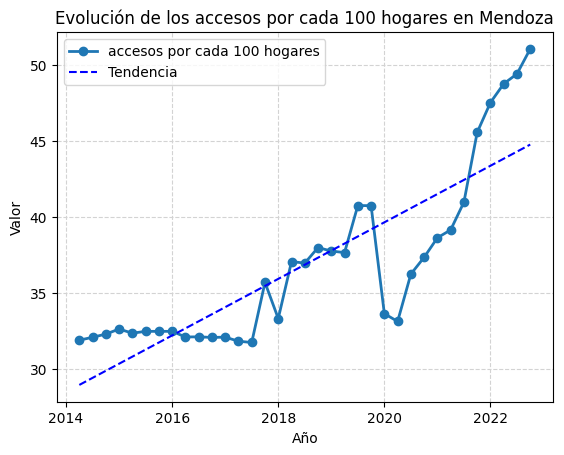

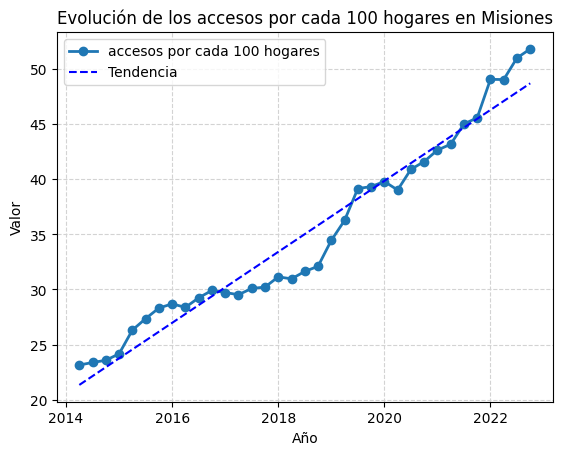

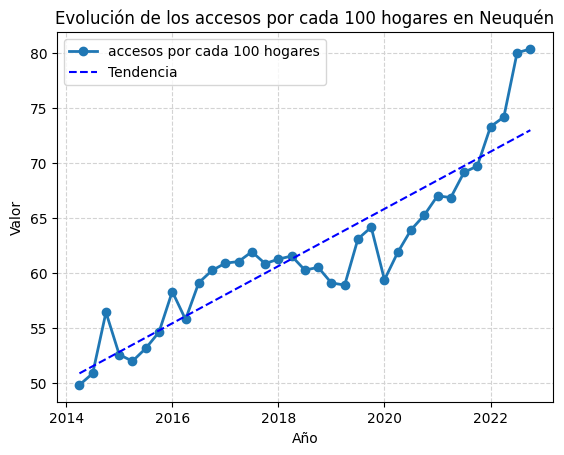

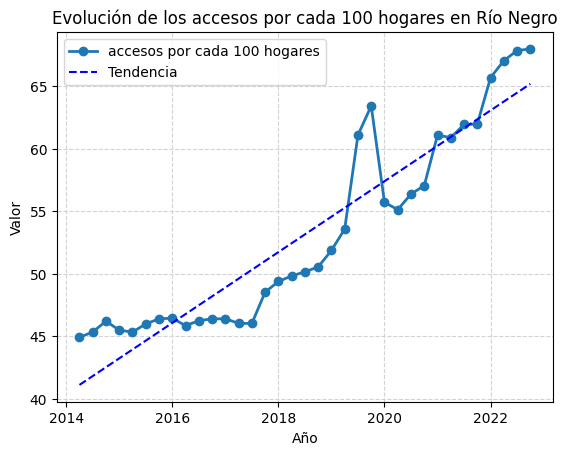

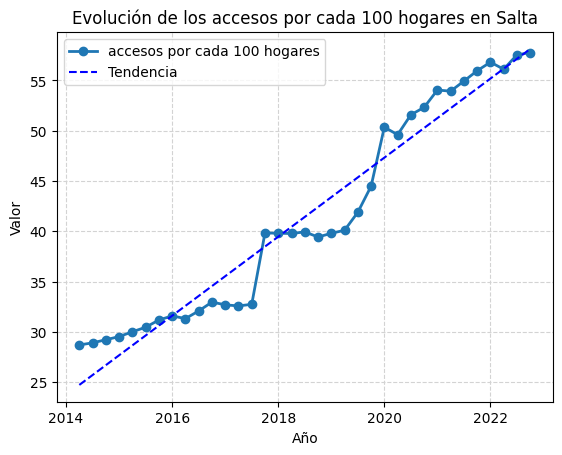

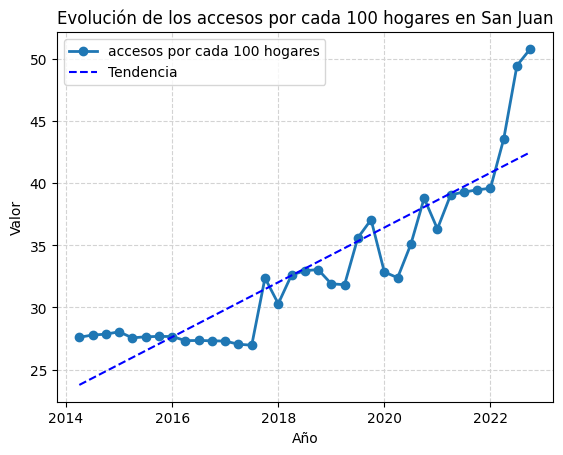

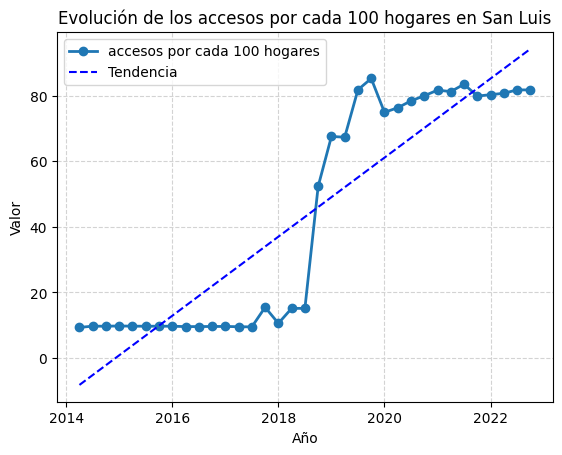

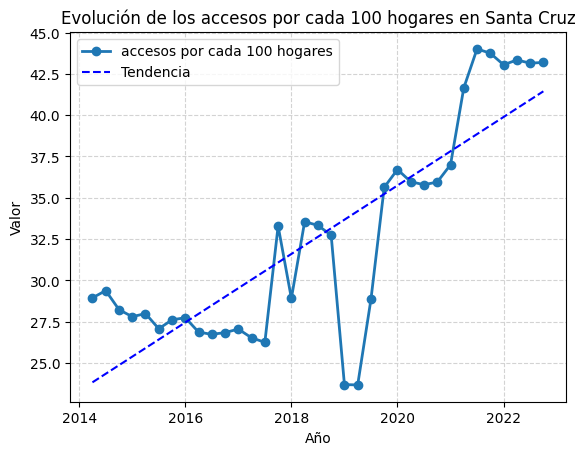

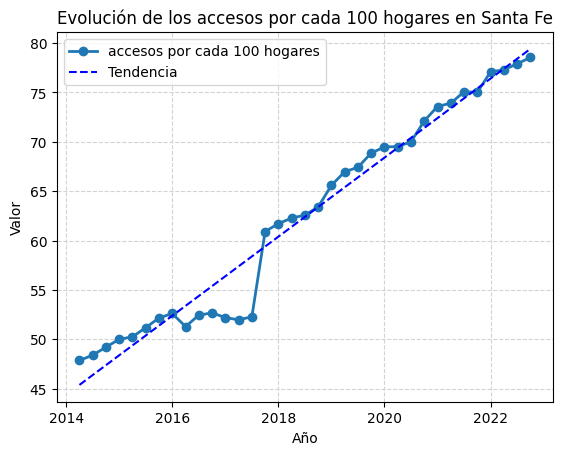

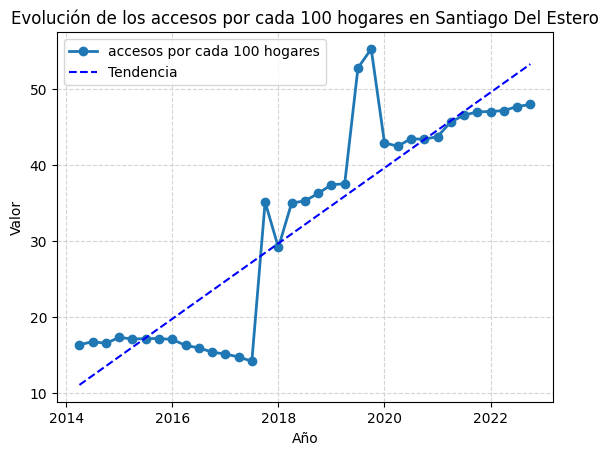

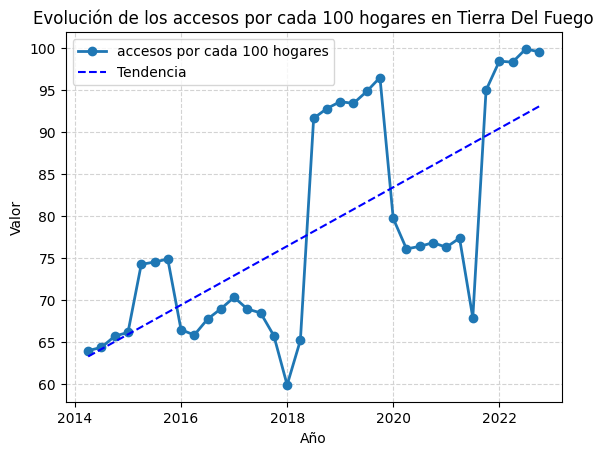

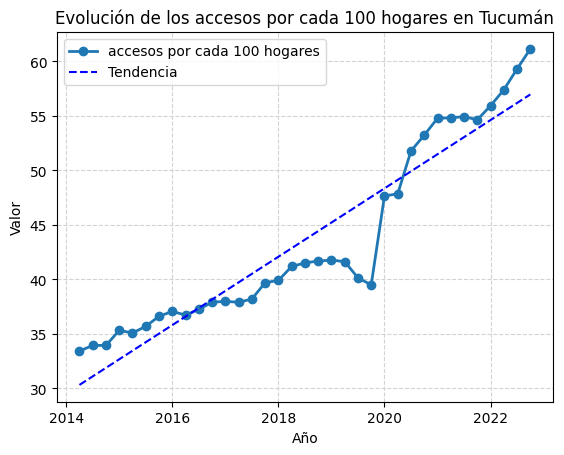

In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los datos por provincia
grupos = df_pen_int_fij_x100h.groupby('provincia')

# Iterar sobre cada grupo y hacer un gráfico de línea para cada columna
for nombre_provincia, grupo in grupos:
    # Obtener todas las columnas excepto 'provincia', 'anio' y 'trimestre'
    columnas = [col for col in grupo.columns if col not in ['anio_tri', 'provincia', 'anio', 'trimestre', 'variacion de los accesos por cada 100 hogares']]
    
    # Crear un gráfico de línea para cada columna
    for columna in columnas:
        # Crear un gráfico de línea suave para la columna
        x = grupo['anio'] + grupo['trimestre'] / 4
        y = grupo[columna].interpolate()
        plt.plot(x, y, marker='o', label=columna, linewidth=2)
        
        # Calcular la tendencia usando una regresión lineal
        slope, intercept = np.polyfit(x, y, 1)
        trendline = intercept + slope*x
        
        # Agregar la línea de tendencia al gráfico
        plt.plot(x, trendline, linestyle='--', color='blue', label='Tendencia')
    
    # Añadir etiquetas y leyendas
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.title(f'Evolución de los accesos por cada 100 hogares en {nombre_provincia}')
    plt.legend()
    # Activar líneas de cuadrícula con estilo punteado de color gris claro
    plt.grid(linestyle='--', color='lightgrey')
    
    # Mostrar el gráfico
    plt.show()



In [552]:
df_pen_int_fij_x100h.head()

,anio_tri,anio,trimestre,provincia,accesos por cada 100 hogares,variacion de los accesos por cada 100 hogares
839,20141,2014,1,Tucumán,33.42,0.0
816,20141,2014,1,Buenos Aires,54.57,0.0
817,20141,2014,1,Capital Federal,112.25,0.0
818,20141,2014,1,Catamarca,24.25,0.0
819,20141,2014,1,Chaco,20.72,0.0


# Guardo

In [553]:
df_pen_int_fij_x100h.to_csv('../CSV_Cleaned/df_pen_int_fij_x100h_var.csv', index=False, mode='w')


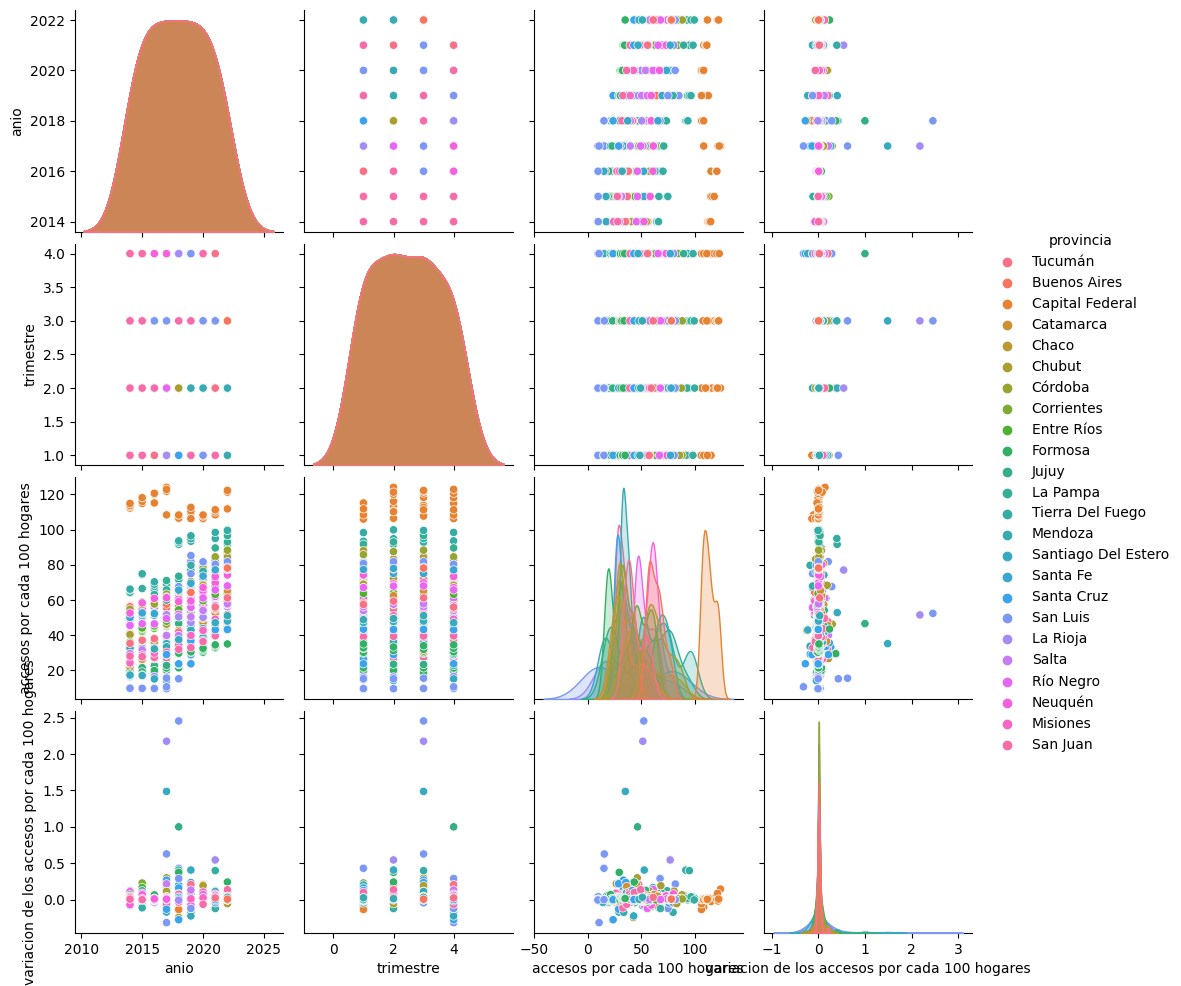

In [554]:
sns.pairplot(df_pen_int_fij_x100h,hue='provincia')